# Heart Disease Classification

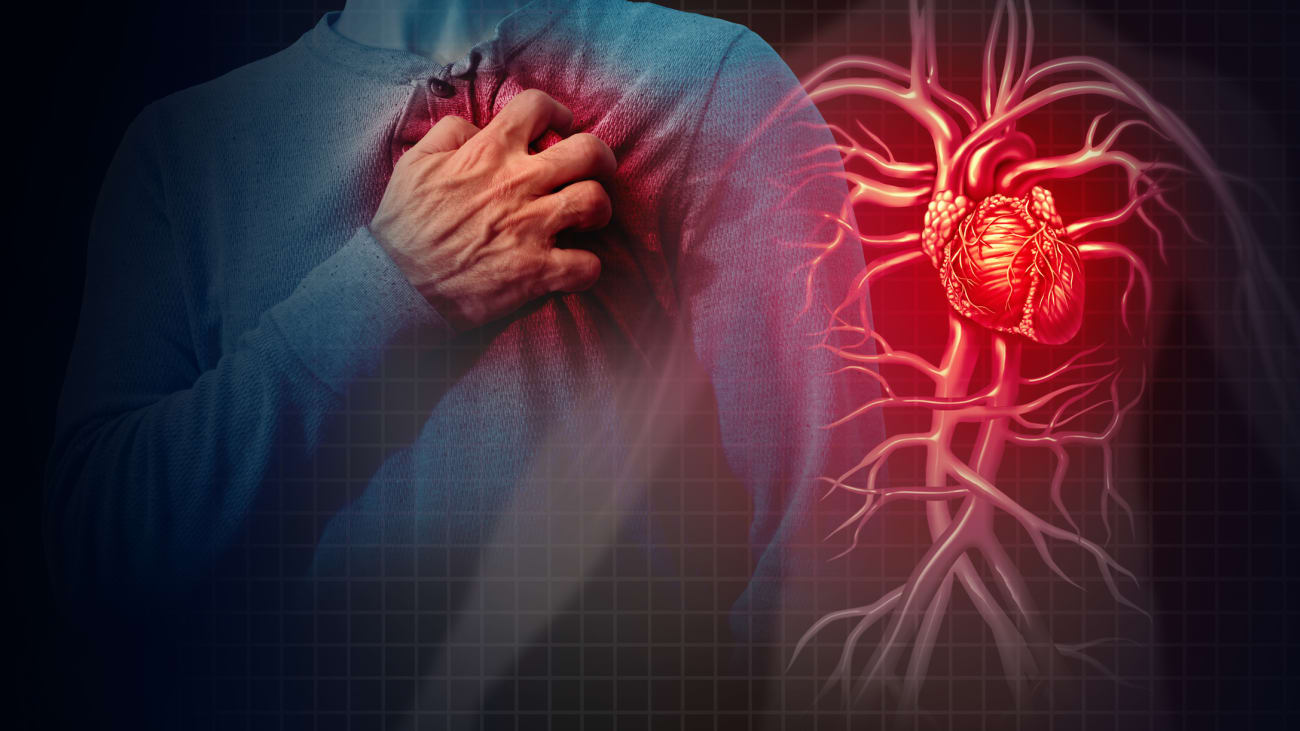

In [37]:
from IPython.display import Image
Image("./cardiac disease.jpg", width=720, height=420)

## Data Description

In [ ]:
import pandas as pd

In [44]:
data = pd.read_csv('./data/heart.csv')
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1


In [47]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,1.000000


* age: 연령 (year)
* sex: 성별 (남성=1, 여성=0)
* cp: 흉통 양상(4가지 타입)
* trestbps: 휴식 중 혈압 (mmHg) (in mm Hg on admission to the hospital)
* chol: 콜레스테롤 수치 (serum cholestoral in mg/dl)
* fbs: 공복시 혈당 (> 120 mg/dl: 인 경우 1, 아니면 0)
* restecg: 휴식중 심전도 결과 (0, 1, 2)
* thalach: 최대 심박수 maximum heart rate achieved
* exang: 운동으로 인한 exercise induced angina
* oldpeak: 심전도 검사에서 ST의 구간이 하강한 상태
* slope: 심전도 검사의 ST분절의 최고 경사 the slope of the peak exercise ST segment
* ca: 심근의 혈액을 공급하는 관상동맥 중(Coronary artery) 중, 조영하였을 때, 조영이 잘 되었던 혈관의 수
* target: 심질환 여부

In [48]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
target        int64
dtype: object

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


-----------------------------------------------------

## Visualization

In [50]:
# target == 1
case = data.loc[data.target == 1]
case['chol'].hist()

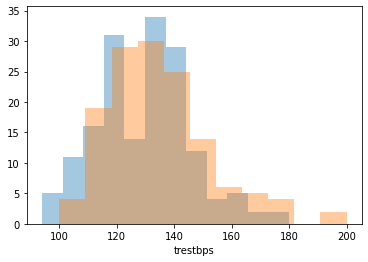

In [117]:
import seaborn as sns  # 시각화 라이브러리: matplot, seaborn
sns.distplot(case['trestbps'], kde=False)

# control 군에서도 히스토그램의 플롯팅을 진행해보세요.
control = data.loc[data.target == 0]
sns.distplot(control['trestbps'], kde=False)

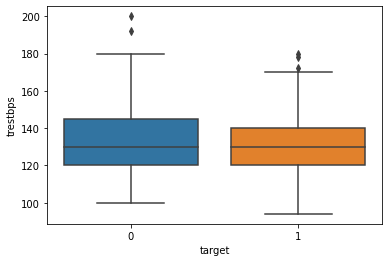

In [57]:
# Box plot으로 시각화

sns.boxplot(x='target', y='trestbps', data=data)

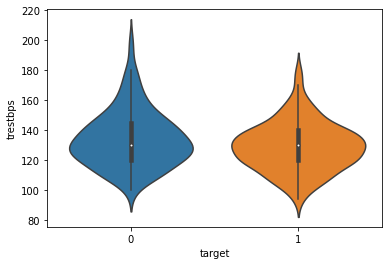

In [58]:
sns.violinplot(x='target', y='trestbps', data=data)

###### 1.4 그룹핑(Grouping)<a name='Chapter1_4'></a>
각 변수의 통계량(1st, 2nd, 3nd, 4th moments)을 확인

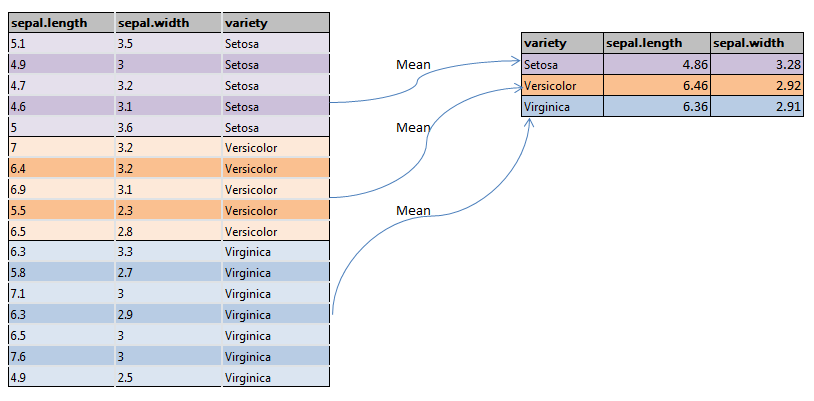

In [59]:
Image('./grouping.png')

In [60]:
data.groupby('target').mean()  # max, min, mean, count() 을 모두 조사해봅시다.

data.groupby('target').skew()  # Skewness

# data.gropuby('target').kurtosis() # Groupby을 이용한 kurtosis은 판다스에서 안타깝게 지원이안됩니다.

# Alternative? 

# data.loc[data.target == 0].kurtosis()
# data.loc[data.target == 1].kurtosis()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
target,,,,,,,,,,,,
0,-0.548502,-1.739584,1.649560,0.858872,0.316402,1.881258,0.624617,-0.296783,-0.206199,0.741389,0.032571,0.480970
1,0.120951,-0.258993,-0.131417,0.424543,1.745595,2.101431,-0.241816,-0.707711,2.101431,1.646658,-1.166896,2.796355


In [115]:
# 질환(target)이 있는 사람과 없는 사람의 연령의 평균과 std
print(
    data.groupby('target').mean().loc[0, 'age'],
    data.groupby('target').std().loc[0, 'age'],
    data.loc[data.target == 1]['age'].mean(),
    data.loc[data.target == 1].std()['age'],
)

56.60144927536232 7.96208153750117 52.5030303030303 9.535955221202723


## Null Check

In [121]:
data['age']

array([[1.00211023, 1.00312003, 1.0044814 , 1.00626241, 1.00852885,
        1.01134231, 1.01476028, 1.0188382 , 1.02363266, 1.0292043 ],
       [1.0356185 , 1.04294217, 1.0512363 , 1.06054443, 1.07087896,
        1.08220797, 1.09444534, 1.10744746, 1.12101927, 1.1349313 ],
       [1.1489483 , 1.16286673, 1.17655498, 1.1899865 , 1.20325396,
        1.21655444, 1.23014151, 1.24425054, 1.25901437, 1.27439393],
       [1.29014843, 1.30586039, 1.32101357, 1.33510349, 1.34774678,
        1.3587536 , 1.36813948, 1.37607349, 1.38278314, 1.38845091],
       [1.39313905, 1.39676597, 1.39913553, 1.4       , 1.39912604,
        1.39633634, 1.39151502, 1.38458446, 1.37547636, 1.36412262],
       [1.35048112, 1.33459333, 1.31665199, 1.29704828, 1.27637196,
        1.25535385, 1.23476148, 1.21527595, 1.19738577, 1.18132702],
       [1.16708361, 1.1544416 , 1.14307607, 1.13264216, 1.12284567,
        1.11348002, 1.10442968, 1.09565105, 1.08714577, 1.07893951],
       [1.07107203, 1.06359727, 1.0565869

In [122]:
data['age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: age, Length: 303, dtype: bool

In [ ]:
data.isna()['age']

# Exploratory data analysis

## Pearson Correlation

In [64]:
data.corr(method='pearson')  # correlation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.098297,-0.068710,0.279596,0.213594,0.121277,-0.116694,-0.398086,0.096644,0.209896,-0.168627,0.276342,-0.225331
sex,-0.098297,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.068710,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279596,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213594,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121277,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116694,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398086,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096644,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.209896,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696


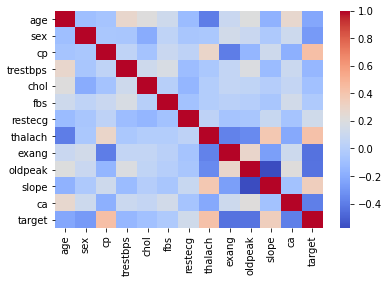

In [126]:
import seaborn as sns

sns.heatmap(data.corr(), cmap='coolwarm')

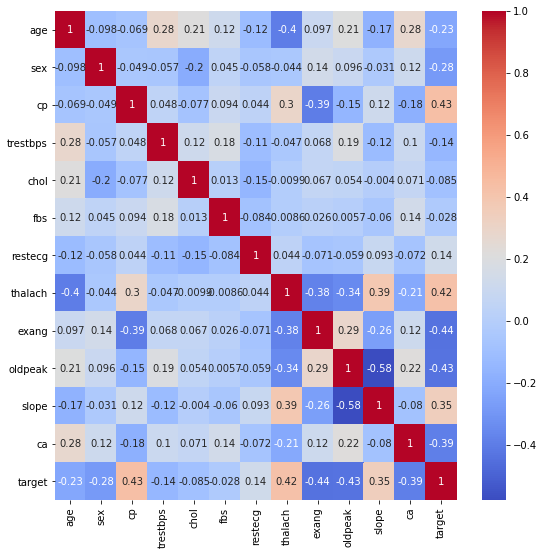

In [65]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(9, 9))

sns.heatmap(data.corr(), cmap='coolwarm', annot=True) # corr() 메서드는 spearman, pearson 둘다 가능합니다.

## Univariate Logistic Regression

In [66]:
from statsmodels.discrete.discrete_model import Logit

model = Logit(endog=data['target'], exog=data['age'])
result = model.fit()
coef, p_val = result.params[0], result.pvalues[0]
print(coef, p_val)

Optimization terminated successfully.
         Current function value: 0.691845
         Iterations 3
0.0018528490147490758 0.37476529668653213


In [67]:
conti_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [68]:
results = []

for col in conti_cols:
    model = Logit(endog=data['target'], exog=data[col])
    result = model.fit(verbose=False)
    coef, p_val = result.params[0], result.pvalues[0]
    results.append([coef, p_val])

logistic_result = pd.DataFrame(results, columns=['coef', 'pval'])
logistic_result.index = conti_cols

logistic_result

Optimization terminated successfully.
         Current function value: 0.691845
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.690744
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.690712
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.681617
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.657573
         Iterations 5


,coef,pval
age,0.001853,0.374765
trestbps,0.001046,0.228132
chol,0.000555,0.225177
thalach,0.002019,0.008620
oldpeak,-0.370837,0.000016


## Comparative analysis

In [69]:
from scipy.stats import ttest_ind

control = data.loc[data.target == 0]['chol']
case = data.loc[data.target == 1]['chol']
ttest_ind(control, case)

Ttest_indResult(statistic=1.4842450762526977, pvalue=0.13879032695600638)

In [70]:
from scipy.stats import mannwhitneyu

mannwhitneyu(control, case)

MannwhitneyuResult(statistic=9789.5, pvalue=0.01785759100568821)